In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import sklearn
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

### Univariate statistics

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
cancer = load_breast_cancer()

In [18]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape %s" % (X_train.shape, ))
print("X_train_selected shape: %s" % (X_train_selected.shape,))

X_train.shape (284, 80)
X_train_selected shape: (284, 40)


In [19]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr = LogisticRegression(max_iter=10000).fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with selected features: 0.933


### Model based feature selection


In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),  threshold="median")

In [21]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [22]:
X_train_l1 = select.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_l1.shape: {X_train_l1.shape}")

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


<IPython.core.display.Javascript object>


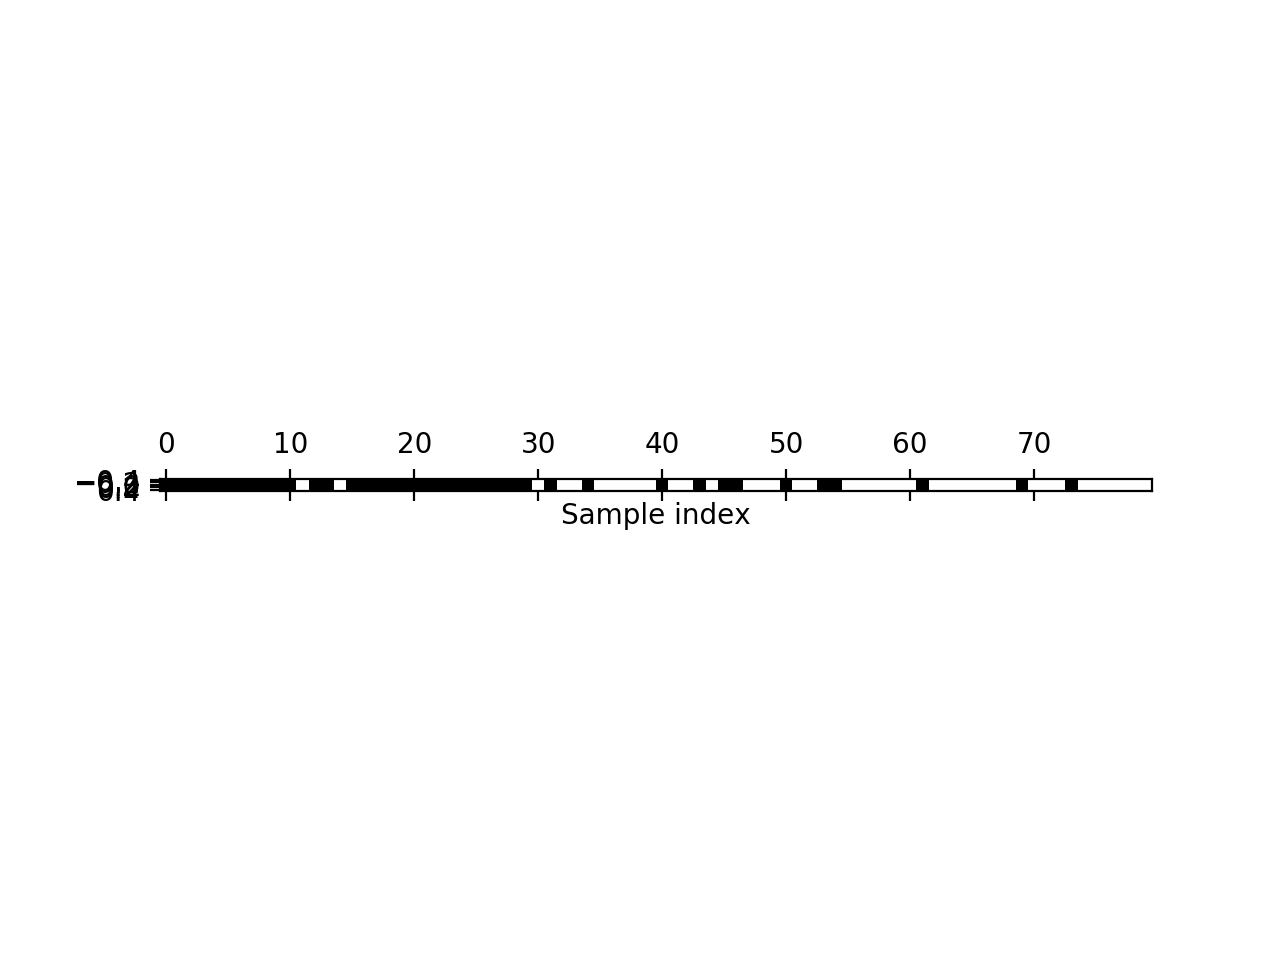

Text(0.5,0,'Sample index')

In [23]:
mask = select.get_support()
fig, ax = plt.subplots()
ax.matshow(mask.reshape(1, -1), cmap='gray_r')
ax.set_xlabel("Sample index")

In [26]:
X_test_l1 = select.transform(X_test)
lr = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train)
print("Test score: {}".format(lr.score(X_test_l1, y_test)))

Test score: 0.9473684210526315


### Iterative feature selection

<IPython.core.display.Javascript object>


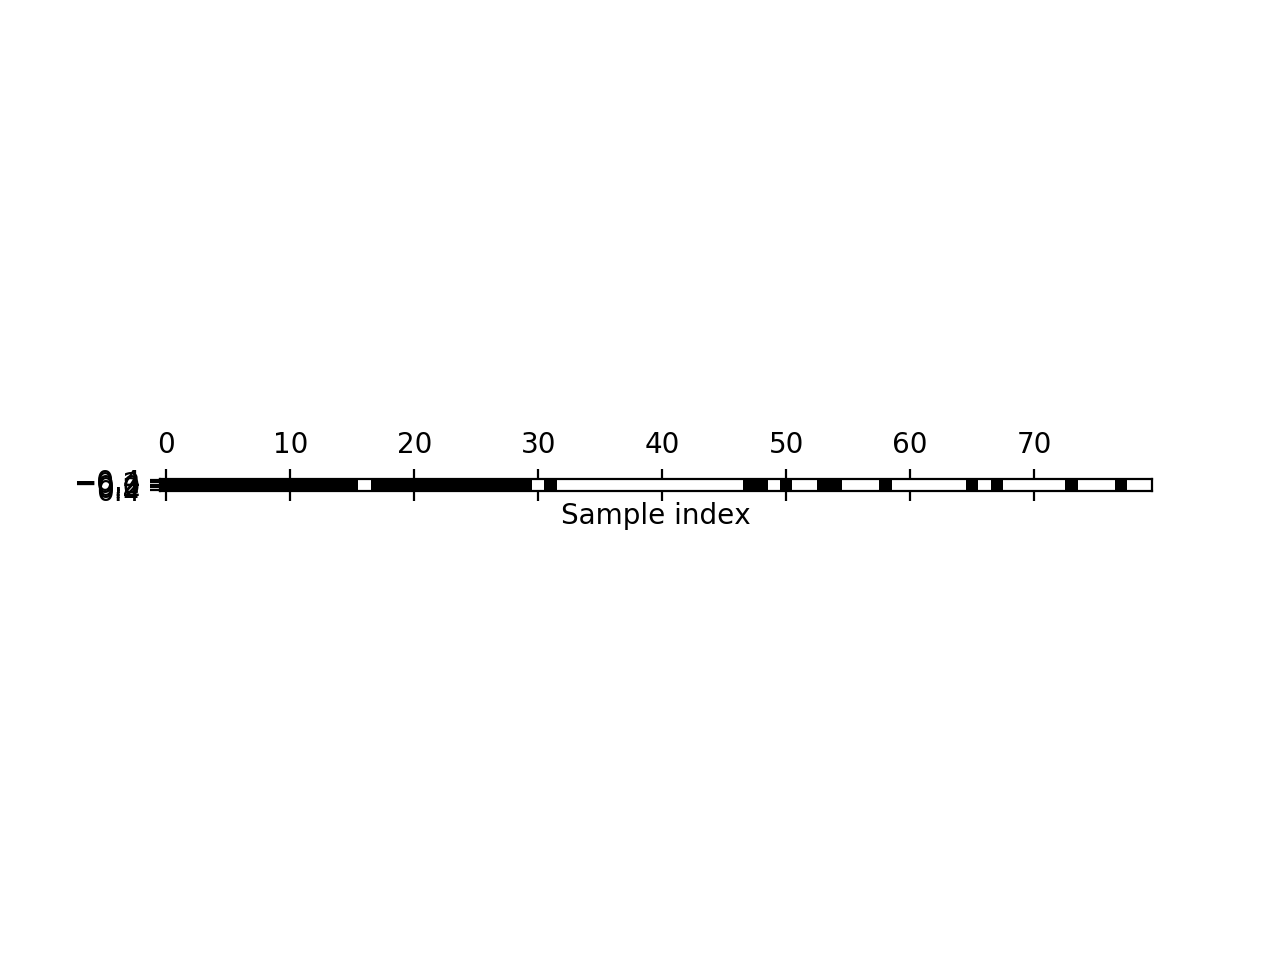

Text(0.5,0,'Sample index')

In [27]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
fig, ax = plt.subplots()
ax.matshow(mask.reshape(1, -1), cmap="gray_r")
ax.set_xlabel("Sample index")

In [28]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.940
